# Logistics Regression - Solves Classification Problems

## Step 1 - Collecting Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_data = pd.read_csv('titanic_data.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Step 2 - Analyzing Data

In [3]:
print(len(titanic_data.index))

1309


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
WikiId         1304 non-null float64
Name_wiki      1304 non-null object
Age_wiki       1302 non-null float64
Hometown       1304 non-null object
Boarded        1304 non-null object
Destination    1304 non-null object
Lifeboat       502 non-null object
Body           130 non-null object
Class          1304 non-null float64
dtypes: float64(6), int64(4), object(11)
memory usage: 214.9+ KB


C:\Users\Rishabh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Rishabh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


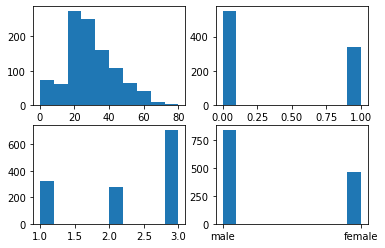

In [5]:
plt.subplot(2,2,1)
plt.hist(titanic_data['Age'])
plt.subplot(2,2,2)
plt.hist(titanic_data['Survived'])
plt.subplot(2,2,3)
plt.hist(titanic_data['Pclass'])
plt.subplot(2,2,4)
plt.hist(titanic_data['Sex'])
plt.show()

## Step 3 - Data Wrangling

In [6]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1305,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1306,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1307,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [7]:
titanic_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WikiId            5
Name_wiki         5
Age_wiki          7
Hometown          5
Boarded           5
Destination       5
Lifeboat        807
Body           1179
Class             5
dtype: int64

In [8]:
titanic_data_1 = titanic_data[['Survived','Pclass','Sex','Age','Parch']]
titanic_data_1.head()

,Survived,Pclass,Sex,Age,Parch
0,0.0,3,male,22.0,0
1,1.0,1,female,38.0,0
2,1.0,3,female,26.0,0
3,1.0,1,female,35.0,0
4,0.0,3,male,35.0,0


In [9]:
titanic_data_1.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age         263
Parch         0
dtype: int64

In [10]:
titanic_data_1.Age.fillna(titanic_data_1['Age'].mean(), inplace = True)

C:\Users\Rishabh\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
titanic_data_1.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
Parch         0
dtype: int64

In [12]:
titanic_data_1.dropna(inplace = True)

C:\Users\Rishabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
titanic_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null float64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Parch       891 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 41.8+ KB


In [14]:
titanic_data_1.head()

,Survived,Pclass,Sex,Age,Parch
0,0.0,3,male,22.0,0
1,1.0,1,female,38.0,0
2,1.0,3,female,26.0,0
3,1.0,1,female,35.0,0
4,0.0,3,male,35.0,0


In [15]:
sex_dummies = pd.get_dummies(titanic_data_1['Sex'], drop_first = True)
sex_dummies.head()

,male
0,1
1,0
2,0
3,0
4,1


In [16]:
pclass_dummies = pd.get_dummies(titanic_data_1['Pclass'], drop_first = True)
pclass_dummies.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [17]:
final_data = pd.concat([titanic_data_1,sex_dummies,pclass_dummies], axis = 'columns')
final_data

,Survived,Pclass,Sex,Age,Parch,male,2,3
0,0.0,3,male,22.000000,0,1,0,1
1,1.0,1,female,38.000000,0,0,0,0
2,1.0,3,female,26.000000,0,0,0,1
3,1.0,1,female,35.000000,0,0,0,0
4,0.0,3,male,35.000000,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0.0,2,male,27.000000,0,1,1,0
887,1.0,1,female,19.000000,0,0,0,0
888,0.0,3,female,29.881138,2,0,0,1
889,1.0,1,male,26.000000,0,1,0,0


In [18]:
final_data.drop(['Pclass','Sex'], axis = 'columns', inplace = True)
final_data.head()

,Survived,Age,Parch,male,2,3
0,0.0,22.0,0,1,0,1
1,1.0,38.0,0,0,0,0
2,1.0,26.0,0,0,0,1
3,1.0,35.0,0,0,0,0
4,0.0,35.0,0,1,0,1


## Step 4 - Train Data

In [19]:
x = final_data.drop('Survived', axis = 1)
y = final_data['Survived']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 5)
(179, 5)
(712,)
(179,)


In [23]:
x_train.head()

,Age,Parch,male,2,3
140,29.881138,2,0,0,1
439,31.000000,0,1,1,0
817,31.000000,1,1,1,0
378,20.000000,0,1,0,1
491,21.000000,0,1,0,1


In [24]:
y_train.head()

140    0.0
439    0.0
817    0.0
378    0.0
491    0.0
Name: Survived, dtype: float64

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_predict = model.predict(x_test)

In [28]:
y_predict[:5]

array([0., 0., 0., 1., 1.])

In [29]:
y_test.head()

495    0.0
648    0.0
278    0.0
31     1.0
255    1.0
Name: Survived, dtype: float64

## Step 5 - Accuracy Check

In [30]:
import sklearn.metrics as sm

In [31]:
sm.r2_score(y_test,y_predict)

0.12740447957839274

In [32]:
sm.classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n         0.0       0.82      0.85      0.84       110\n         1.0       0.75      0.70      0.72        69\n\n    accuracy                           0.79       179\n   macro avg       0.78      0.78      0.78       179\nweighted avg       0.79      0.79      0.79       179\n'

In [33]:
sm.confusion_matrix(y_test,y_predict)

array([[94, 16],
       [21, 48]], dtype=int64)

In [34]:
sm.accuracy_score(y_test,y_predict)

0.7932960893854749